# Library Imports

In [1]:
import gensim # Python library for using word embedding models
import gensim.downloader # to download pretrained models
from sklearn.manifold import TSNE # dimensionality reduction method
import matplotlib.pyplot as plt # for plotting
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
warnings.filterwarnings('ignore') # no warnings pls :)

print(list(gensim.downloader.info()['models'].keys())) #list the pretrained models available from Gensim

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


# Word2Vec

In [2]:
# lets load a pretrained Word2Vec model
w2v = gensim.downloader.load('word2vec-google-news-300')

Having loaded a Word2vec model we are gonna go through some of the basic functionalities:
1. Given a word, extract its vector
2. Given a word, extract its most similar words
3. Demonstrate relationships between word embeddings
4. Visualize embeddings in a 2D space

## 1. Extracting word vectors

In [3]:
# getting a vector for a specific word
w2v.get_vector('twitter')

array([ 0.10205078, -0.08398438, -0.10546875,  0.09863281, -0.08935547,
       -0.00842285, -0.09570312, -0.31835938,  0.12597656, -0.2578125 ,
       -0.03442383, -0.31445312,  0.03808594,  0.17089844,  0.17773438,
        0.12890625, -0.07714844,  0.01000977, -0.14648438,  0.06298828,
        0.17480469,  0.05908203,  0.46875   , -0.09619141, -0.36328125,
        0.08642578, -0.29101562,  0.14453125, -0.16992188, -0.07324219,
       -0.3125    , -0.02258301,  0.00408936, -0.22558594, -0.08642578,
       -0.16796875, -0.02600098,  0.09472656,  0.18359375,  0.08740234,
        0.18847656, -0.16113281,  0.17285156,  0.29492188,  0.47265625,
       -0.16796875,  0.01635742, -0.0859375 , -0.17871094, -0.01416016,
       -0.16308594,  0.08642578, -0.11621094,  0.4375    ,  0.34960938,
       -0.07958984, -0.01904297,  0.08447266, -0.03857422, -0.6171875 ,
        0.15917969, -0.18652344, -0.02587891,  0.00159454, -0.15429688,
       -0.00212097, -0.02441406,  0.06738281,  0.26367188,  0.24

In [4]:
# or simply
w2v['twitter']

array([ 0.10205078, -0.08398438, -0.10546875,  0.09863281, -0.08935547,
       -0.00842285, -0.09570312, -0.31835938,  0.12597656, -0.2578125 ,
       -0.03442383, -0.31445312,  0.03808594,  0.17089844,  0.17773438,
        0.12890625, -0.07714844,  0.01000977, -0.14648438,  0.06298828,
        0.17480469,  0.05908203,  0.46875   , -0.09619141, -0.36328125,
        0.08642578, -0.29101562,  0.14453125, -0.16992188, -0.07324219,
       -0.3125    , -0.02258301,  0.00408936, -0.22558594, -0.08642578,
       -0.16796875, -0.02600098,  0.09472656,  0.18359375,  0.08740234,
        0.18847656, -0.16113281,  0.17285156,  0.29492188,  0.47265625,
       -0.16796875,  0.01635742, -0.0859375 , -0.17871094, -0.01416016,
       -0.16308594,  0.08642578, -0.11621094,  0.4375    ,  0.34960938,
       -0.07958984, -0.01904297,  0.08447266, -0.03857422, -0.6171875 ,
        0.15917969, -0.18652344, -0.02587891,  0.00159454, -0.15429688,
       -0.00212097, -0.02441406,  0.06738281,  0.26367188,  0.24

## 2. Extracting word similarities

In [5]:
# getting the most similar words to a term
w2v.most_similar('twitter')

[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431627511978149),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530220031738),
 ('Tweeted', 0.6950210332870483),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [6]:
# getting the most similar words to a term
w2v.most_similar('twitter', topn=20)

[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431627511978149),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530220031738),
 ('Tweeted', 0.6950210332870483),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469),
 ('Tweets', 0.6546129584312439),
 ('Facebook', 0.6483454704284668),
 ('TwitterTwitter', 0.6432195901870728),
 ('twittered', 0.6393427848815918),
 ('micro_blogging_site', 0.6302406787872314),
 ('Twitters', 0.62877357006073),
 ('twitterverse', 0.6279213428497314),
 ('blog', 0.6257337927818298),
 ('Follow_AndroidGuys', 0.6226419806480408),
 ('onTwitter', 0.6222246289253235)]

In [7]:
w2v.similarity('twitter', '4chan')

0.34480923

In [8]:
w2v.similarity('twitter', 'myspace')

0.5744767

## 3. Word Relationships

There are two ways to study relationships:
1. Using **most_similar_cosmul** method:
    
    Documentation: Find the top-N most similar words, using the multiplicative combination objective, proposed by Omer Levy and Yoav Goldberg “Linguistic Regularities in Sparse and Explicit Word Representations”. Positive words still contribute positively towards the similarity, negative words negatively, but with less susceptibility to one large distance dominating the calculation. In the common analogy-solving case, of two positive and one negative examples, this method is equivalent to the “3CosMul” objective (equation (4)) of Levy and Goldberg.



2. Using **similar_by_vector** method and doing the operations manually: Different results because of normalization 

In [9]:
w2v.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566672325134),
 ('Queen_Consort', 0.8150269985198975),
 ('queens', 0.8099815249443054),
 ('crown_prince', 0.808997631072998),
 ('royal_palace', 0.8027306795120239),
 ('monarchy', 0.8019613027572632),
 ('prince', 0.800979733467102),
 ('empress', 0.7958388328552246)]

In [10]:
w2v.similar_by_vector(w2v.get_vector('king', norm=True) + 
                      w2v.get_vector('woman', norm=True) -
                      w2v.get_vector('man', norm=True))

[('king', 0.7992597818374634),
 ('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869)]

In [11]:
w2v.most_similar_cosmul(positive=['greece', 'rome'], negative=['italy'])

[('athens', 0.8228010535240173),
 ('samuel', 0.8189568519592285),
 ('cro', 0.8184024691581726),
 ('caroline', 0.8162517547607422),
 ('sess', 0.816144585609436),
 ('zz', 0.8157657980918884),
 ('afta', 0.8151275515556335),
 ('tting', 0.8136284947395325),
 ('hev', 0.8132066130638123),
 ('YEO_MAN', 0.8131966590881348)]

In [12]:
w2v.similar_by_vector(w2v.get_vector('greece', norm=True) + 
                      w2v.get_vector('rome', norm=True) -
                      w2v.get_vector('italy', norm=True))

[('rome', 0.7282393574714661),
 ('greece', 0.7129800915718079),
 ('athens', 0.4865588843822479),
 ('samuel', 0.4780660569667816),
 ('cro', 0.47506487369537354),
 ('afta', 0.47211799025535583),
 ('caroline', 0.472048819065094),
 ('zz', 0.47096753120422363),
 ('holmes', 0.467720627784729),
 ('leonard', 0.4676584005355835)]

## 4. Embedding visualization 

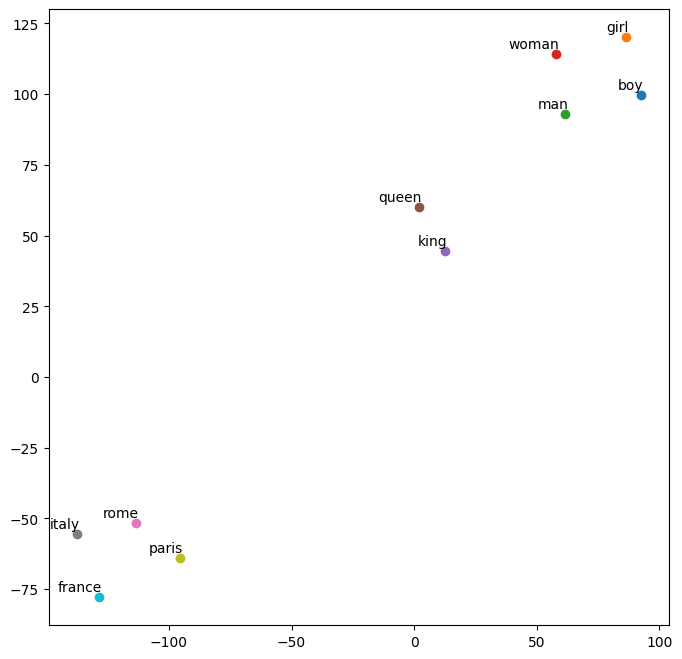

In [13]:
# method to visualize words in a 2D Space

def visualize_embeddings_using_tsne(model, target_words):
    # extract the embeddings given the target words
    embeddings = [model[x] for x in target_words]

    
    # reduce the dimensionality of the embeddings. From 300 to 2
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=128)
    coordinates = tsne_model.fit_transform(np.array(embeddings))

    # extract the x,y coordinates from the reduced embeddings
    x = [i[0] for i in coordinates]
    y = [i[1] for i in coordinates]
    
    # plot the reducted embeddings
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(target_words[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
    
targets = ["boy", "girl", "man", "woman", "king", "queen",
            "rome", "italy", "paris", "france" ]

visualize_embeddings_using_tsne(w2v, targets)

# Training our own word2vec models

In [15]:
# lets try to train a model on trump tweets (dataset here: https://drive.google.com/file/d/1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6/view?usp=sharing)
tweetsdf = pd.read_csv('tweets_01-08-2021.csv') # load the tweets using Pandas
tweetsdf.iloc[0] # lets see what its included in the dataset

id                                                            98454970654916608
text         Republicans and Democrats have both created our economic problems.
isRetweet                                                                     f
isDeleted                                                                     f
device                                                                TweetDeck
favorites                                                                    49
retweets                                                                    255
date                                                        2011-08-02 18:07:48
isFlagged                                                                     f
Name: 0, dtype: object

In [16]:
docs = tweetsdf['text'].tolist()

### Preprocessing

In general, performing general preprocessing on our input helps in generating higher quality embeddings. Some useful preprocessing steps:

1. Make sure all the text is in lowercase
2. Keep only latin characters (remove numbers)
3. Remove punctuation
4. Remove URLs
5. Tokenize the text
6. Remove stopwords


In [17]:
import re
from stop_words import get_stop_words
stop_words = get_stop_words('en')
from nltk.corpus import stopwords

preprocessed_docs = []
for doc in docs:
    res = doc.lower() # lowercase
    res = re.sub(r'[^a-zA-Z ]', '', res) # remove numbers/punctuation
    res = re.sub(r'http\S+', '', res) # remove URLs 
    words = []
    for word in res.split(' '): 
        if len(word)>0 and word not in stop_words:
            words.append(word)
    preprocessed_docs.append(words)

Lets see some examples of the preprocessed documents and their initial version

In [18]:
print(docs[0], preprocessed_docs[0])

Republicans and Democrats have both created our economic problems. ['republicans', 'democrats', 'created', 'economic', 'problems']


In [19]:
print(docs[1], preprocessed_docs[1])

I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y ['thrilled', 'back', 'great', 'city', 'charlotte', 'north', 'carolina', 'thousands', 'hardworking', 'american', 'patriots', 'love', 'country', 'cherish', 'values', 'respect', 'laws', 'always', 'put', 'america', 'first', 'thank', 'wonderful', 'evening', 'kag']


In [20]:
# lets define the parameters of our Word2Vec model
our_w2v_model = gensim.models.Word2Vec(sentences=preprocessed_docs,
                                        vector_size=100, #dimensionality of the vectors
                                        min_count=10, #Ignore all words with frequency less than this
                                        window=5, #Size of the context window 
                                        epochs= 5, #Number of iterations over the corpus
                                        sg=1, #Whether to use Skip-gram or CBOW (1 for skip-gram, 0 for CBOW)
                                        workers=5, #Number of workers to train the model (faster training on multicore machines)
                                        ) 

In [21]:
our_w2v_model.wv.most_similar('hillary')

[('clinton', 0.9072769284248352),
 ('crooked', 0.8919854760169983),
 ('dnc', 0.7696635127067566),
 ('emails', 0.7390462160110474),
 ('acid', 0.7375718951225281),
 ('clintons', 0.729702889919281),
 ('h', 0.7278409600257874),
 ('hillarys', 0.7233667969703674),
 ('washed', 0.7162141799926758),
 ('firm', 0.7098633050918579)]

In [22]:
# having trained a model we can save it to use it later
our_w2v_model.save('trained-models/trump-tweets.w2v')

In [23]:
# we can load a model with 
trump_model = gensim.models.Word2Vec.load('trained-models/trump-tweets.w2v')

In [24]:
trump_model.wv.most_similar('hillary')

[('clinton', 0.9072769284248352),
 ('crooked', 0.8919854760169983),
 ('dnc', 0.7696635127067566),
 ('emails', 0.7390462160110474),
 ('acid', 0.7375718951225281),
 ('clintons', 0.729702889919281),
 ('h', 0.7278409600257874),
 ('hillarys', 0.7233667969703674),
 ('washed', 0.7162141799926758),
 ('firm', 0.7098633050918579)]

In [25]:
# we can extract the words in the vocabulary using

vocabulary_words = [key for key,value in trump_model.wv.key_to_index.items()]

In [26]:
len(vocabulary_words)

6230

In [27]:
print("First word in vocabulary: %s" %(vocabulary_words[0]))

First word in vocabulary: realdonaldtrump


In [28]:
# finding out how many times a word appeared in the corpus
trump_model.wv.get_vecattr('realdonaldtrump', 'count')

10889